#### pandas 내장 그래프 도구
- 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포트하지 않고 간단히 그래프를 그릴 수 있음
- 선그래프: df.plot()메소드 적용 시 다른 옵션을 추가하지 않으면 기본적인 선 그래프를 그림 / 추세를 봄
- 막대그래프: df.plot(kind='bar'), df.plot(kind='barh'(가로세로), stacked=True(막대그래프 누적으로 층 쌓느냐), alpha=0.8 (농도))
- 히스토그램: df.plot(kind='hist') #도수분표표 구간별로빈도 보여주는 것
- 산점도: df.plot(x ='', y='', kind='scatter'), 상관관계 볼 수 있음 / 원형태면 상관관계 x, y =x에 90도 선-> 역의 방향
- 박스 플롯 : df.plot(kind='box'),df.boxplot(column=['feature']) 특정변수의 데이터 분포와 분산 정도에 대한 정보를 제공

#### matplotlib
- histogram: plt.hist(x, bins=)
- line plot: plt.plot(x, y)
- plt.bar(x, y, color='')
- scatter plot:plt.scatter(x, y)

#### seaborn
조금 더 세련된 그림
- sns.distplot(data,bins=, color=, kde=) / 기본적인 히스토그램 + 선으로써 분포 표현
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)
- sns.barplot(x, y, data, color)
- sns.jointplot(x, y, data, color)
- sns.pairplot(data, hue, palette)
- sns.lmplot(x, y, data, color)
- sns.regplot(x, y, data, fig_reg=False)

In [217]:
import pandas as pd
import numpy as np

df = pd.read_csv('./dataset/주가데이터.csv')
df.head()

,연월일,당일종가,전일종가,시가,고가,저가,거래량
0,2018-07-02,10100,600,10850,10900,10000,137977
1,2018-06-29,10700,300,10550,10900,9990,170253
2,2018-06-28,10400,500,10900,10950,10150,155769
3,2018-06-27,10900,100,10800,11050,10500,133548
4,2018-06-26,10800,350,10900,11000,10700,63039


In [218]:
df.drop(['전일종가'],axis=1,inplace=True)
df.columns = ['Date','Close','Start','High','Low','Volume']
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [221]:
# 연습문제 - Date를 datetime으로 변경한 후 인덱스로 세팅

df['Date']=pd.to_datetime(df['Date'])
df1 = df.set_index('Date')# Date 열로 인덱스 설정하겠다
df1.drop(['Volume'],axis=1,inplace=True)
df1.head()

# 인덱스 순서대로 정렬 후 출력
df2 = df1.sort_index()
df2.head()

,Close,Start,High,Low
Date,,,,
2018-06-01,11900,11800,12100,11750
2018-06-04,11900,11900,12200,11700
2018-06-05,12150,11800,12250,11800
2018-06-07,11950,12200,12300,11900
2018-06-08,11950,11950,12200,11800


<AxesSubplot:xlabel='Date'>

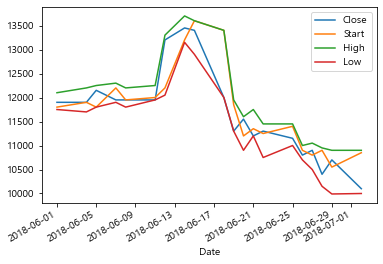

In [222]:
# 선 그래프

df2.plot()

<AxesSubplot:xlabel='Date'>

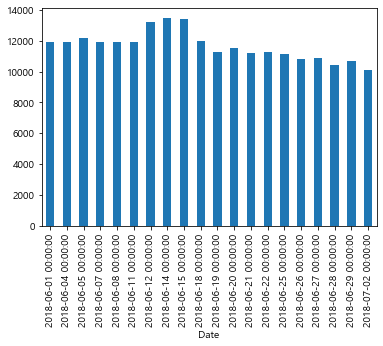

In [223]:
df2.Close.plot(kind='bar')

<AxesSubplot:xlabel='Date'>

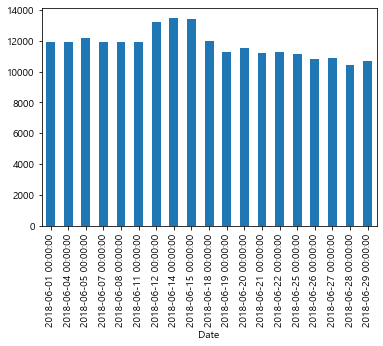

In [224]:
# 연습문제 - 6월 데이터만 추출해서 Close 칼럼으로 일별 막대그래프를 표현

#df.loc[df.Date.dt.month==6].Close.plot(kind='bar')
#datetime 형태면 인덱싱이 됨
df2.loc['2018-06'].Close.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

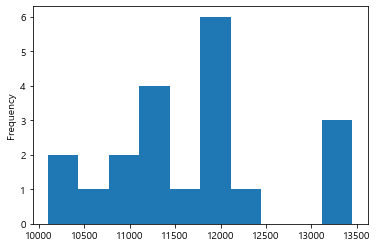

In [226]:
df2.Close.plot(kind='hist')

In [229]:
df.rename(columns={'Volume':'Volume'}, inplace=True)
df

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039
5,2018-06-25,11150,11400,11450,11000,55519
6,2018-06-22,11300,11250,11450,10750,134805
7,2018-06-21,11200,11350,11750,11200,133002
8,2018-06-20,11550,11200,11600,10900,308596
9,2018-06-19,11300,11850,11950,11300,180656


<AxesSubplot:ylabel='Frequency'>

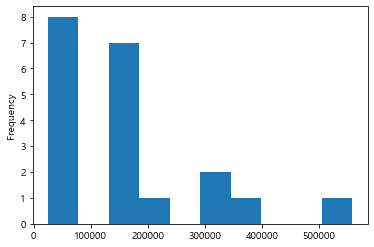

In [230]:
df.Volume.plot(kind='hist')

In [231]:
df.Volume.describe()

count        20.000000
mean     158014.150000
std      134473.512003
min       25171.000000
25%       58323.250000
50%      134176.500000
75%      185836.000000
max      558148.000000
Name: Volume, dtype: float64

<AxesSubplot:xlabel='Volume', ylabel='Count'>

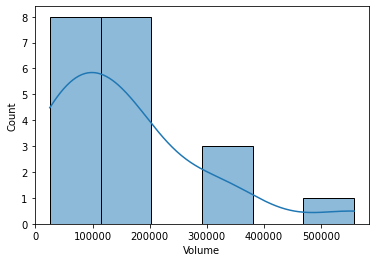

In [11]:
import seaborn as sns
sns.histplot(df.Volume, kde=True)

<AxesSubplot:xlabel='Close', ylabel='Volume'>

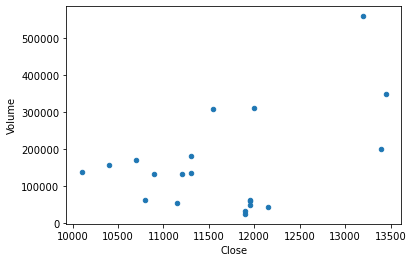

In [12]:
# 산점도(scatter)

df.plot(x='Close', y='Volume', kind='scatter')

In [17]:
df.describe()

,Close,Start,High,Low,Volume
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,11662.500000,11755.000000,12015.000000,11374.500000,158014.150000
std,927.060294,865.250192,907.729962,884.369981,134473.512003
min,10100.000000,10550.000000,10900.000000,9990.000000,25171.000000
25%,11087.500000,11125.000000,11350.000000,10737.500000,58323.250000
50%,11725.000000,11800.000000,12025.000000,11500.000000,134176.500000
75%,11962.500000,12050.000000,12262.500000,11912.500000,185836.000000
max,13450.000000,13600.000000,13700.000000,13150.000000,558148.000000


<AxesSubplot:>

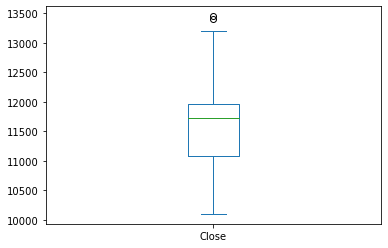

In [13]:
# Box Plot

df.Close.plot(kind='box')

### Box plot 의미 해석
- IQR(Inter Quartile Range): 제3사분위수(Q3) - 제1사분위수(Q1) => 박스의 높이
- lower whisker: Q1 - 1.5 * IQR 이내인 값 중에서 최솟값
- upper whisker: Q3 + 1.5 * IQR 이내인 값 중에서 최댓값
- 이상치: lower whisker, upper whisker를 벗어나는 값 (존재할 경우 위치를 동그라미 등으로 표시)

<img src = '참고용.png' STYLE='width: 800px;'>

In [32]:
# Close coloumn의 이상치

Q1 = df.Close.quantile(0.25)
Q3 = df.Close.describe()['75%']
IQR = Q3-Q1
uw_check = Q3+1.5*IQR
print(uw_check, '\n')
print(df.Close.sort_values(ascending=False).head(), '\n')
print("uw 13200을 벗어나는 값 선택: ")
df.Close.loc[df.Close>uw_check]

13275.0 

12    13450
11    13400
13    13200
17    12150
10    12000
Name: Close, dtype: int64 

uw 13200을 벗어나는 값 선택: 


11    13400
12    13450
Name: Close, dtype: int64

<AxesSubplot:>

upper whisker 이상 값 확인 > upper whisker 값: 13437.5

13437.5를 벗어나는 값: 
11    13600
Name: Start, dtype: int64 



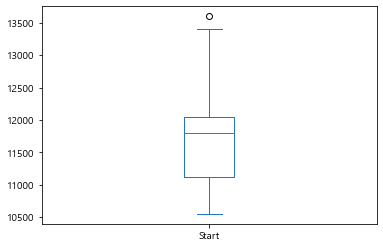

In [243]:
# [과제] Start 칼럼의 분포 및 이상치 여부를 탐색하는 Box Plot 및 이상치 구하기

Q1 = df.Start.quantile(0.25)
Q3 = df.Start.quantile(0.75)
IQR = Q3-Q1
uw_check = Q3+1.5*(IQR)
display(df.Start.plot(kind='box'))
print(f'upper whisker 이상 값 확인 > upper whisker 값: {uw_check}\n')
print(f'{uw_check}를 벗어나는 값: ')
print(df.Start.loc[df.Start>uw_check], '\n')

[과제] df_ep 데이터 프레임으로 다음을 수행
- 선그래프
- 'south' 칼럼의 막대그래프
- 'south' 칼럼의 히스토그램
- box plot

In [249]:
df_ep = pd.read_excel('./dataset/df_ep.xlsx')
df_ep.head()

,year,south,north
0,1990,1077,277
1,1991,1186,263
2,1992,1310,247
3,1993,1444,221
4,1994,1650,231


<AxesSubplot:>

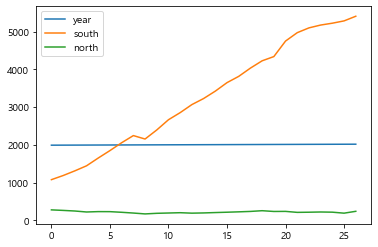

In [264]:
# 선그래프

display(df_ep.plot()) # 디폴트-선그래프

<AxesSubplot:>

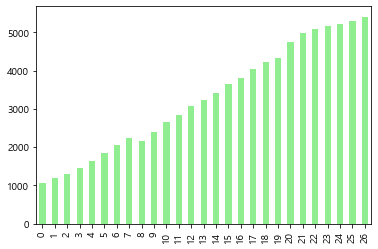

In [277]:
# 'south' 칼럼의 막대그래프

display(df_ep.south.plot(kind='bar', color='lightgreen'))
# display(df_ep.south.plot(kind='barh', color='lightgreen')) # 그래프 축 변경

<AxesSubplot:ylabel='Frequency'>

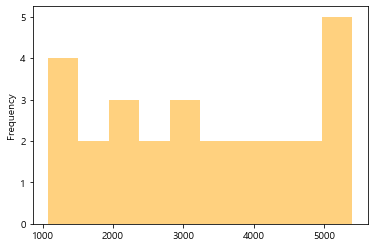

In [288]:
# 'south' 칼럼의 히스토그램

# display(df_ep.south.hist(color='orange', alpha=0.5)) # 히스토그램 표 라인 있음
display(df_ep.south.plot(kind='hist', color='orange', alpha=0.5)) # 라인 없음(왜?)

<AxesSubplot:>

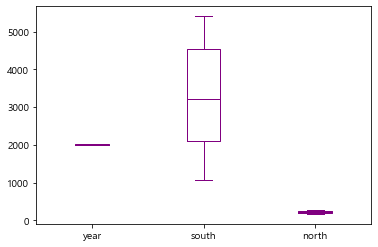

In [304]:
# box plot

# display(df_ep.boxplot()) # 박스플롯 표 라인 있음
display(df_ep.plot(kind='box', color='purple')) # 박스플롯 표 라인 없음(왜??)
# 박스플롯도 색 변환 가능한듯

In [305]:
# [과제] df_auto의 각 칼럼을 시각화해서 탐색한 후 인사이트 기술(5개 이상)

df_auto = pd.read_excel('./dataset/auto-mpg.xlsx')
df_auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


(array([1., 0., 3., 1., 1., 2., 1., 1., 2., 0., 4., 1., 3., 4., 1., 2., 3.,
        0., 3., 1., 3., 0., 2., 3., 2., 1., 1., 1., 2., 1.]),
 array([ 2. ,  3.8,  5.6,  7.4,  9.2, 11. , 12.8, 14.6, 16.4, 18.2, 20. ,
        21.8, 23.6, 25.4, 27.2, 29. , 30.8, 32.6, 34.4, 36.2, 38. , 39.8,
        41.6, 43.4, 45.2, 47. , 48.8, 50.6, 52.4, 54.2, 56. ]),
 <BarContainer object of 30 artists>)

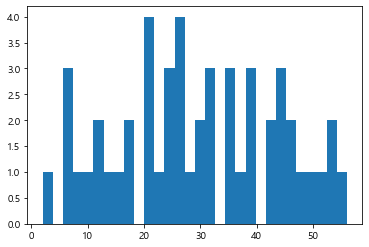

In [232]:
import matplotlib.pyplot as plt

np.random.seed(0)
data = np.arange(50) + np.random.randint(1, 10, size=50)
plt.hist(data, bins=30)

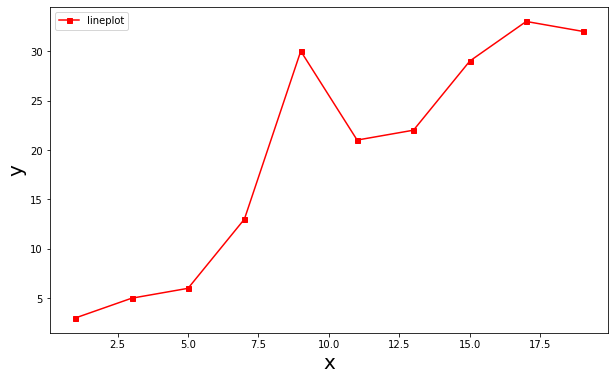

In [65]:
import numpy as np

x = np.arange(1, 21, 2)
y = np.array([3, 5, 6, 13, 30, 21, 22, 29, 33, 32])

plt.figure(figsize=(10, 6)) # 그래프 전체 크기(해상도?)
plt.plot(x, y, color='red', marker='s', markersize=5) # 그래프 색, 마커 모양, 마커 크기
plt.xlabel('x', size=20)
plt.ylabel('y', size=20) # x, y 글자 크기
plt.legend(labels=['lineplot'])

Text(0.5, 1.0, 'Line Graph')

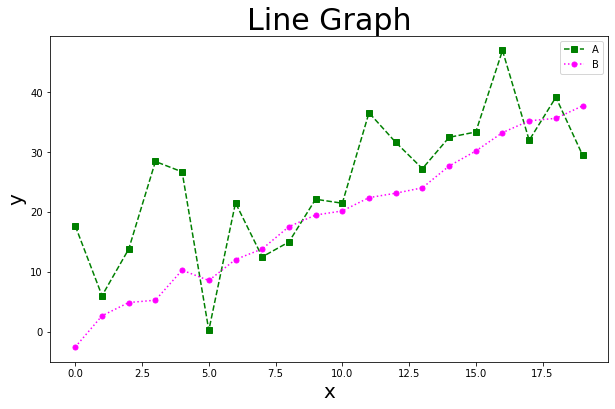

In [117]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.arange(20)
y1 = np.arange(20)*2 + np.random.randn(20)*10
y2 = np.arange(20)*2 + np.random.randn(20)

plt.figure(figsize=(10, 6))
plt.plot(x, y1, 'gs--') # 색, 마커모양, 선 한거번에 설정 가능
plt.plot(x, y2, color='magenta', marker='o', markersize=5, linestyle='dotted')
plt.xlabel('x', size=20)
plt.ylabel('y', size=20) # x, y 글자 크기
plt.legend(labels=['A', 'B'])
plt.title('Line Graph', size=30) # 그래프 제목, 크기

Text(0.5, 0, 'X')

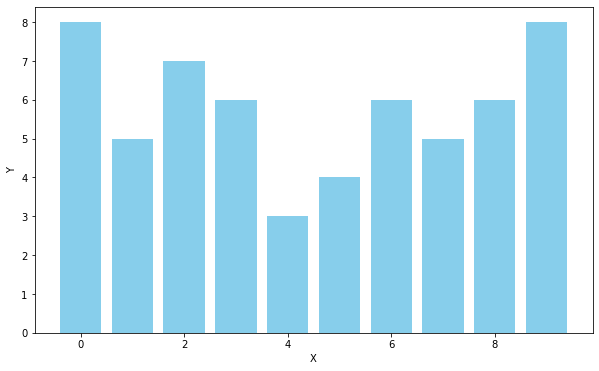

In [116]:
# 막대그래프

y = np.random.randint(2, 10, size=10)
x = range(len(y))
plt.figure(figsize=(10, 6))
plt.bar(x, y, width=0.8, color='skyblue')
plt.ylabel('Y')
plt.xlabel('X')

In [118]:
import pandas as pd

df = pd.read_csv('./dataset/movie.csv')
df.head()

,targetDt,rank,rankOldAndNew,movieCd,movieNm,salesAmt,audiCnt
0,20180220,1,OLD,20170561,블랙 팬서,1339822000,171158
1,20180220,2,OLD,20168250,골든슬럼버,363771900,48097
2,20180220,3,OLD,20179205,조선명탐정: 흡혈괴마의 비밀,296896400,40318
3,20180220,4,OLD,20176121,흥부: 글로 세상을 바꾼 자,126148600,16991
4,20180220,5,OLD,20078561,명탐정 코난:감벽의 관,78434800,11466


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

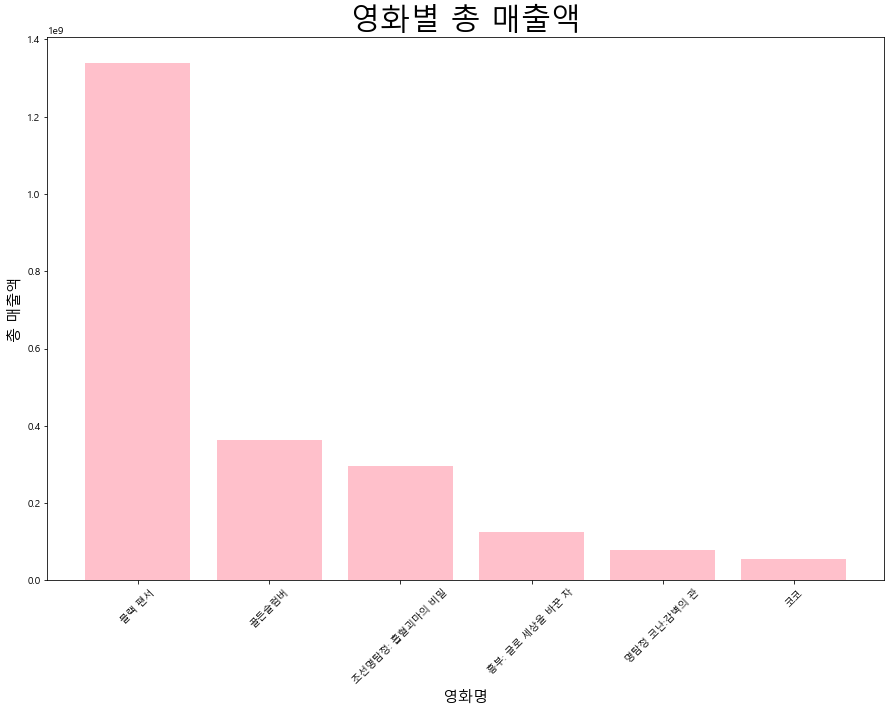

In [148]:
# 연습문제 - movie.csv에서 x축 movieNm, y축 salesAmt로 막대그래프

import matplotlib as mpl

mpl.rc('font', family='Malgun Gothic') # 한글폰트 설정
mpl.rcParams['axes.unicode_minus'] = False # 마이너스 단위 처리

x = df.movieNm
y = df.salesAmt

plt.figure(figsize=(15, 10))
plt.bar(x, y, color='pink')
plt.xlabel('영화명', size=15)
plt.ylabel('총 매출액', size=15)
plt.title('영화별 총 매출액', size=30)
plt.xticks(rotation=45)

Text(0, 0.5, 'weigth')

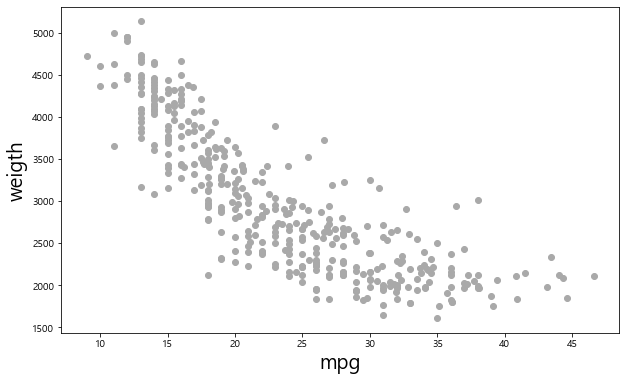

In [156]:
# scatter plot

df_auto = pd.read_excel('./dataset/auto-mpg.xlsx', engine='openpyxl')
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='darkgray')
plt.xlabel('mpg', size=20)
plt.ylabel('weigth', size=20)

(array([ 3., 10., 40., 38., 36., 37., 30., 31., 21., 33., 24., 24., 20.,
        18., 13.,  9.,  4.,  1.,  5.,  1.]),
 array([ 9.  , 10.88, 12.76, 14.64, 16.52, 18.4 , 20.28, 22.16, 24.04,
        25.92, 27.8 , 29.68, 31.56, 33.44, 35.32, 37.2 , 39.08, 40.96,
        42.84, 44.72, 46.6 ]),
 <BarContainer object of 20 artists>)

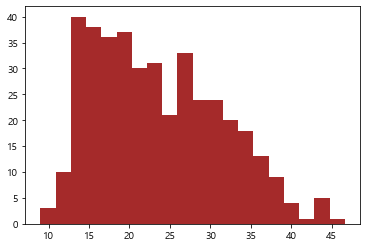

In [165]:
# histogram

plt.hist(x, bins=20, color='brown')

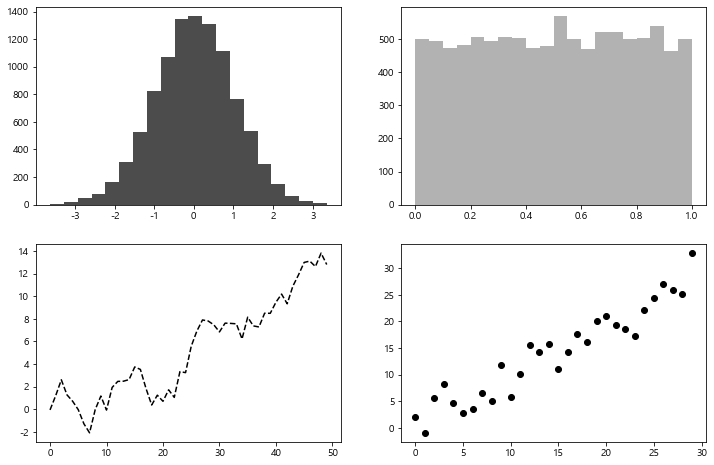

In [191]:
fig = plt.figure(figsize=(12, 8))
# figure가 2×2 크기이고 4개의 서브플롯
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.hist(np.random.randn(10000), bins=20, color='k', alpha=0.7) # alpha=불투명도
ax2.hist(np.random.rand(10000), bins=20, color='k', alpha=0.3)
ax3.plot(np.random.randn(50).cumsum(), 'k--')
ax4.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30), color='k')

In [ ]:
# [과제] 히스토그램, 선, 막대, 산점도 그래프 4개를 서브플롯으로 출력



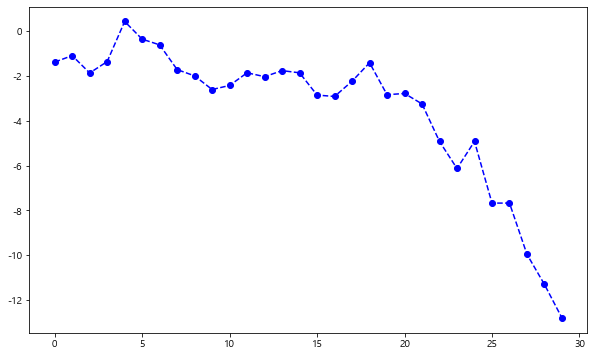

In [195]:
from numpy.random import randn

plt.figure(figsize=(10, 6))
plt.plot(randn(30).cumsum(), linestyle='dashed', color='b', marker='o')

In [196]:
t3 = pd.read_csv('./dataset/titanic3.csv')
t3.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [204]:
# Q. t3 에서 age 열을 범주화한 후 age_cat 열을 추가

def cate_age(age):
    if age<10: cat='Child'
    elif age<20: cat='Teen'
    elif age<30: cat='20s'
    elif age<40: cat='30s'
    elif age<50: cat='40s'
    elif age<60: cat='50s'
    else: cat='Eldery'
    return cat

t3['age_cat']=t3.age.apply(lambda x:cate_age(x))
t3[['age', 'age_cat']]


,age,age_cat
0,29.00,20s
1,0.92,Child
2,2.00,Child
3,30.00,30s
4,25.00,20s
...,...,...
1304,14.50,Teen
1305,NaN,Eldery
1306,26.50,20s
1307,27.00,20s


         pclass  survived      age  sibsp  parch       fare    body  Ratio
age_cat                                                                   
20s         838       127  8402.00    112     77  9198.3038  5125.0    344
30s         488        98  7855.50     80     73  9578.5332  5020.0    232
40s         250        52  5958.50     50     68  5723.5168  3429.0    135
50s         101        32  3751.50     29     21  4384.9541  1889.0     70
Child       216        50   330.17    135    114  2403.4248     4.0     82
Eldery      755        85  2578.00    142     82  7726.7706  2009.0    303
Teen        356        56  2380.00    105     69  4534.9836  1982.0    143


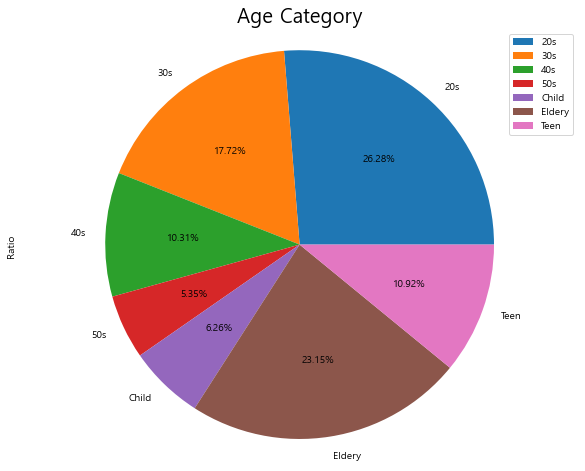

In [214]:
t3['Ratio'] = 1
df_age_cat=t3.groupby('age_cat').sum()
print(df_age_cat)

df_age_cat.Ratio.plot(kind='pie',
                     figsize=(10, 8),
                     autopct='%.2f%%',
                     startangle=0)
plt.title('Age Category', size=20)
plt.axis('equal')
plt.legend(labels=df_age_cat.index, loc='best')